## Pset3 Ito and Stratonovich interpretations of Geometric Brownian Motion
Geometric Brownian SDE: $$dX(t) = X(t)dW(t) \tag{1}$$

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [7]:
#### Helper Function
def histogram_trajectory(x_array, bins, rang):
    """
    input:
        x_array: num_steps * num_points 
        
    output:
        hist_time_array: num_steps * bins, histogram over time
        hist value shown using color
    """
    hist_time_array = np.zeros((len(x_array),bins))
    for i,x_slice in enumerate(x_array):
        hist = np.histogram(x_slice, bins = bins, range = rang)[0]
        hist += 1 # avoid log color scale from blowing up
        hist = hist/max(hist)
        hist_time_array[i] = hist
        
    plt.imshow(hist_time_array.T, 
               norm=matplotlib.colors.LogNorm(), 
               cmap = "viridis", 
               aspect = 'auto')
    
    plt.ylabel(f"bins range: {rang}")
    plt.gca().set_yticks([])
    plt.gca().invert_yaxis()
    plt.xlabel("time steps")
    return hist_time_array

#### 4.1 4.2
#### Ito Interpretation
Euler method reads:
$$
X(t+\Delta t) = X(t) + X(t)\Delta W
$$

In [9]:
#################################################
## Numerical Simulation in Ito Interpretation
#################################################

#### Forward Propagator Helper Function
def X_trajectory_ito(x0, dt, T_max):
    """
    forward propagate x0 with SDE: dX = X(t)dW, where dW = sqrt(dt) Z, Z ~ N(0,1)
    input: x0: (n_points, ndim), initial distribution
    output: X_array: (timesteps, n_points, ndim))
    """
    shape = (int(T_max/dt),*x0.shape)
    X_array = np.zeros(shape)
    X_array[0] = x0
    
    # 0 is filled by initial dist x0
    for i in range(1,int(T_max/dt)):
        X = X_array[i-1]
        Z = np.random.normal(scale=1, size = shape[1:])
        X_array[i] = X + X * Z * np.sqrt(dt)
    return X_array



In [10]:
T_max = 1
dt = 1e-5
n_trajectory = int(2e4)

# distribution of initial condition = delta(x,1)
x0_list = np.array([1]*n_trajectory)

x_array_ito = X_trajectory_ito(x0_list, dt, T_max)

Text(0, 0.5, 'X')

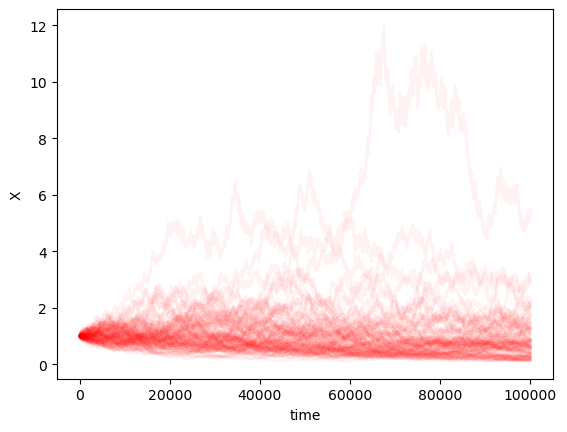

In [172]:
### plot first 100 trajectories
plt.plot(x_array_ito[:,0:100], color = "r", alpha = 0.05)
plt.xlabel("time")
plt.ylabel("X")

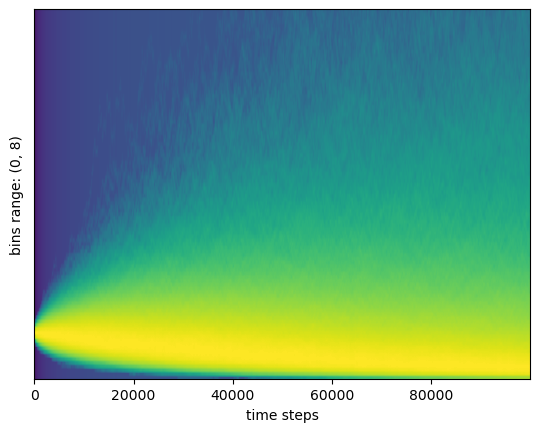

In [173]:
### histogram in time of all trajectories
### Density is shown in color
### Max density of each time slice is normalized to 1 for easier visualization
histogram_trajectory(x_array_ito, bins = 100, rang = (0,8));

In [2]:
def P_ito(x,t):
    return 1 / (np.sqrt(2*np.pi*t)*x) * np.exp(-(np.log(x)+t/2)**2 / (2*t))

def P_strato(x,t):
    return 1 / (np.sqrt(2*np.pi*t)*x) * np.exp(-(np.log(x))**2 / (2*t))

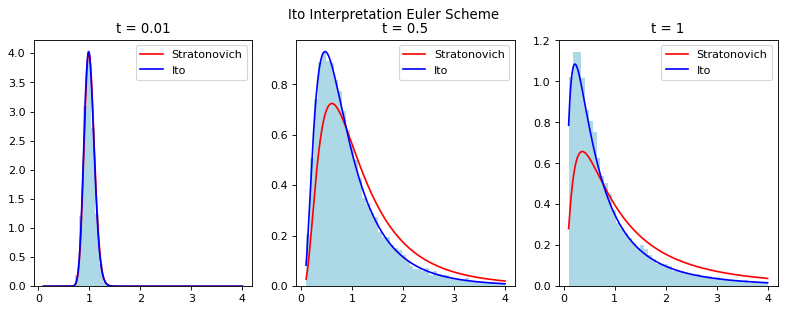

In [93]:
t_list = [0.01, 1/2, 1]
fig = plt.figure(figsize=(len(t_list)*4,4), dpi=80)
ax = fig.subplots(1,len(t_list))
for i,t in enumerate(t_list):
    bin_val, bin_edge, patches = ax[i].hist(x_array_ito[int(t/dt)-1,:], bins = 50, 
                                          density = True, 
                                          range = (0.1,4),
                                          color = "lightblue")
    x = np.linspace(min(bin_edge),max(bin_edge),1000)
    ax[i].plot(x, P_strato(x,t), color = "red", label = "Stratonovich")
    ax[i].plot(x, P_ito(x,t), color = "blue", label = "Ito")
    ax[i].set_title(f"t = {t}")
    ax[i].legend()
plt.suptitle("Ito Interpretation Euler Scheme")
plt.show()

#### Stratonovich Interpretation
##### Euler Method
Stratonovich: $$dX(t) = X(t)dW(t) \tag{1}$$ <br>
To integrate using the Euler scheme, let first convert equation (1) to the corresponding Ito SDE:
$$dX(t) = \frac{x}{2}dt + X(t)dW(t) \tag{2}$$
Then the Euler method reads:
$$
X(t+\Delta t) = X(t) + \frac{X(t)}{2} \Delta t + X(t)\Delta W
$$

In [4]:
#################################################
## Numerical Simulation in Stratonovich Interpretation
#################################################

#### Forward Propagator Helper Function
def X_trajectory_strato(x0, dt, T_max):
    """
    forward propagate x0 with SDE: dX = x/2 dt + X(t)dW, where dW = sqrt(dt) Z, Z ~ N(0,1)
    input: x0: (n_points, ndim), initial distribution
    output: X_array: (timesteps, n_points, ndim))
    """
    shape = (int(T_max/dt),*x0.shape)
    X_array = np.zeros(shape)
    X_array[0] = x0
    
    # 0 is filled by initial dist x0
    for i in range(1,int(T_max/dt)):
        X = X_array[i-1]
        Z = np.random.normal(scale=1, size = shape[1:])
        X_array[i] = X + X * (Z * np.sqrt(dt) + dt / 2)
    return X_array

In [28]:
T_max = 1
dt = 1e-5
n_trajectory = int(2e4)

# distribution of initial condition = delta(x,1)
x0_list = np.array([1]*n_trajectory)

x_array_strato = X_trajectory_strato(x0_list, dt, T_max)

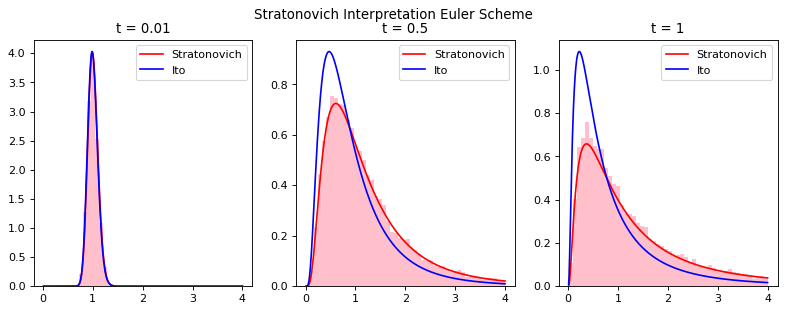

In [94]:
t_list = [0.01, 1/2, 1]
fig = plt.figure(figsize=(len(t_list)*4,4), dpi=80)
ax = fig.subplots(1,len(t_list))
for i,t in enumerate(t_list):
    bin_val, bin_edge, patches = ax[i].hist(x_array_strato[int(t/dt)-1,:], bins = 50, 
                                          density = True, 
                                          range = (0.01,4),
                                          color = "pink")
    x = np.linspace(min(bin_edge),max(bin_edge),1000)
    ax[i].plot(x, P_strato(x,t), color = "red", label = "Stratonovich")
    ax[i].plot(x, P_ito(x,t), color = "blue", label = "Ito")
    ax[i].set_title(f"t = {t}")
    ax[i].legend()
plt.suptitle("Stratonovich Interpretation Euler Scheme")
plt.show()

#### Stratonovich Interpretation
##### Milstein Method
Stratonovich: $$dX(t) = X(t)dW(t) \tag{1}$$ <br>
the Milstein method reads:
$$
X(t+\Delta t) = X(t) + \frac{X(t)}{2} \Delta W^2 + X(t)\Delta W \tag{3}
$$

In [50]:
#################################################
## Numerical Simulation in Stratonovich Interpretation Milstein Scheme
#################################################

#### Forward Propagator Helper Function
def X_trajectory_strato_milstein(x0, dt, T_max):
    """
    forward propagate x0 with SDE: dX = x/2 dt + X(t)dW, where dW = sqrt(dt) Z, Z ~ N(0,1)
    input: x0: (n_points, ndim), initial distribution
    output: X_array: (timesteps, n_points, ndim))
    """
    shape = (int(T_max/dt),*x0.shape)
    X_array = np.zeros(shape)
    X_array[0] = x0
    
    # 0 is filled by initial dist x0
    for i in range(1,int(T_max/dt)):
        X = X_array[i-1]
        Z = np.random.normal(scale=1, size = shape[1:])
        X_array[i] = X + X * (Z * np.sqrt(dt) + Z**2 * dt / 2)
    return X_array

In [52]:
T_max = 1
dt = 1e-5
n_trajectory = int(2e4)

# distribution of initial condition = delta(x,1)
x0_list = np.array([1]*n_trajectory)

x_array_strato_milstein = X_trajectory_strato_milstein(x0_list, dt, T_max)

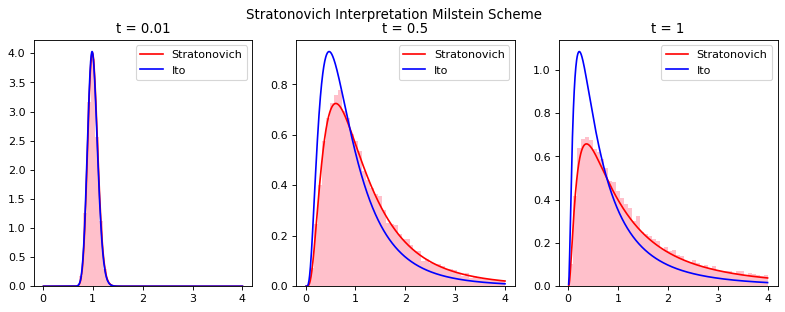

In [95]:
t_list = [0.01, 1/2, 1]
fig = plt.figure(figsize=(len(t_list)*4,4), dpi=80)
ax = fig.subplots(1,len(t_list))
for i,t in enumerate(t_list):
    bin_val, bin_edge, patches = ax[i].hist(x_array_strato_milstein[int(t/dt)-1,:], bins = 50, 
                                          density = True, 
                                          range = (0.01,4),
                                          color = "pink")
    x = np.linspace(min(bin_edge),max(bin_edge),1000)
    ax[i].plot(x, P_strato(x,t), color = "red", label = "Stratonovich")
    ax[i].plot(x, P_ito(x,t), color = "blue", label = "Ito")
    ax[i].set_title(f"t = {t}")
    ax[i].legend()
plt.suptitle("Stratonovich Interpretation Milstein Scheme")
plt.show()

#### Question: for the Stratonovich interpretation, how does the two numerical scheme differ? 
##### Is it just a difference between $\Delta t$ and $\Delta W ^ 2$ in the additional drift term?

In [59]:
def X_trajectory_dw_sqrd(x0, dt, T_max):
    """
    forward propagate x0 with SDE: dX = dW^2, where dW = sqrt(dt) Z, Z ~ N(0,1)
    input: x0: (n_points, ndim), initial distribution
    output: X_array: (timesteps, n_points, ndim))
    """
    shape = (int(T_max/dt),*x0.shape)
    X_array = np.zeros(shape)
    X_array[0] = x0
    
    # 0 is filled by initial dist x0
    for i in range(1,int(T_max/dt)):
        X = X_array[i-1]
        Z = np.random.normal(scale=1, size = shape[1:])
        X_array[i] = X + Z**2 * dt
    return X_array

Text(0, 0.5, 'X')

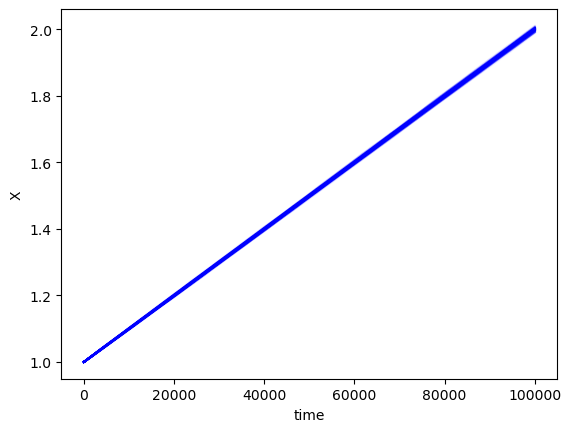

In [62]:
T_max = 1
dt = 1e-5
n_trajectory = int(2e2)

# distribution of initial condition = delta(x,1)
x0_list = np.array([1]*n_trajectory)

x_array_dw_sqrd = X_trajectory_dw_sqrd(x0_list, dt, T_max)

### plot first 100 trajectories
plt.plot(x_array_dw_sqrd, color = "b", alpha = 0.05)
plt.xlabel("time")
plt.ylabel("X")

#### 4.3 Stratonovich Interpretation: Colored Noise modeled as Orstein-Uhlenbeck 
##### Euler Method
The SDE is:
$$
\frac{dX}{dt} = X(t)dQ(t) \tag{1*}
$$
<br>
where $Q(t)$ is modeled as the limit of Orstein Uhlenbeck noise 
<br>
<br>
$$
\tau \frac{dQ(t)}{dt}=-Q(t)+\xi(t) \tag{4}
$$
<br>
In the limit $\tau \rightarrow 0$, equation (4) implies $Q(t)=\xi(t)$
Thus colored noise (eq. 1*) reduces to uncorrelated noise (eq. 1)
<br>
To implement colored noise using Euler's method, let's rewrite eqs (1*) and (4) as: 
$$
\begin{align}
\\dX(t) &= X(t)Q(t)dt
\\dQ(t) &= -dt Q(t)/\tau + dW(t)/\tau
\end{align}
$$

In [9]:
def X_trajectory_colored(x0, dt, T_max, 𝜏):
    """
    forward propagate x0 with SDE: dX = X(t)Q(t)dt, 
                    where Q(t) is the "derivative" of W(t), 
                    approximated as OU process
                    
    input: x0: (n_points, ndim), initial distribution
    output: X_array: (timesteps, n_points, ndim))
    """
    shape = (int(T_max/dt),*x0.shape)
    X_array = np.zeros(shape)
    X_array[0] = x0
    Q = np.zeros(shape=shape[1:])
    
    # 0 is filled by initial dist x0
    for i in range(1,int(T_max/dt)):
        X = X_array[i-1]
        Z = np.random.normal(scale=1, size = shape[1:])
        dw = np.sqrt(dt) * Z
        Q = Q - dt * Q / 𝜏 + dw / 𝜏
        X_array[i] = X + X * Q * dt 
    return X_array

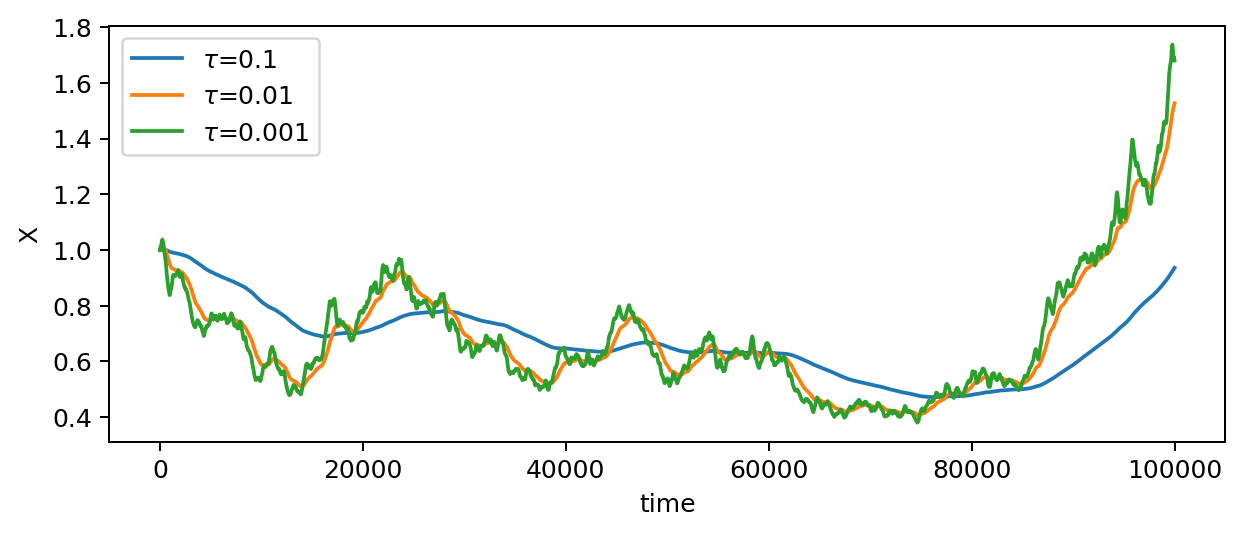

In [10]:
T_max = 1
dt = 1e-5
𝜏 = 0.001 

x0_list = np.array([1]*1)

plt.figure(figsize=(8,3), dpi=180)


for 𝜏 in [0.1, 0.01, 0.001]:
    np.random.seed(0)
    X_array_colored = X_trajectory_colored(x0_list, dt, T_max, 𝜏)
    plt.plot(X_array_colored, label = fr"$\tau$={𝜏}")
plt.xlabel("time")
plt.ylabel("X")
plt.legend()
plt.show()

#### Trajectory smoothness and correlation length of $\tau$
Smaller $\tau$ gives more erratic curves. This is because the noise process Q(t) has stationary correlation:
$$
<Q(t+\Delta t)Q(t)>_{s} = \frac{1}{2\tau}e^{\frac{-\Delta t}{\tau}}
$$
which has correlation time $\tau$. A smaller $\tau$ makes the colored noise less correlated, hence more erratic.

#### 4.4 Empirical distribution with colored noise
#### Relevant variables
**$\tau$: correlation scale of noise** <br>
**$\Delta t$: time step of numerical simulation** <br>
<br>

**Case 1 $\tau > \Delta t$: Simulation is in Stratonovich Regime** <br>
Using correlation time: 0.1, 0.01, 0.001 << dt = 1e-5 <br>

**Case 2 $\tau <= \Delta t$: Simulation is in Ito regime** <br>
When correlation time 1e-5 = dt, the Euler integration scheme becomes **too coarse to resolve** the small correlation time. Hence the simulated density becomes more like Ito. <br>
**Caution:**
$$
Q(t+\Delta t)=Q(t)-\frac{\Delta t}{\tau}Q(t)+\frac{1}{\tau}\Delta W(t)
$$
Q diverges when $\tau < \Delta t$

##### Machine Epsilon
the smallest varaible scale dt = 1e-5 is well above machine precision for double float

In [3]:
a = np.random.rand(1)
print(type(a[0]))
print(f"machine epsilon single{2**(-23)}")
print(f"machine epsilon double{2**(-52)}")

<class 'numpy.float64'>
machine epsilon single1.1920928955078125e-07
machine epsilon double2.220446049250313e-16


In [4]:
T_max = 1
dt = 1e-5
n_trajectory = int(2e4)

# distribution of initial condition = delta(x,1)
x0_list = np.array([1]*n_trajectory)
𝜏_list = [0.1, 0.01, 0.001, 1e-5] 
X_array_colored_list = []
for 𝜏 in 𝜏_list:
    X_array_colored_list += [X_trajectory_colored(x0_list, dt, T_max, 𝜏)]

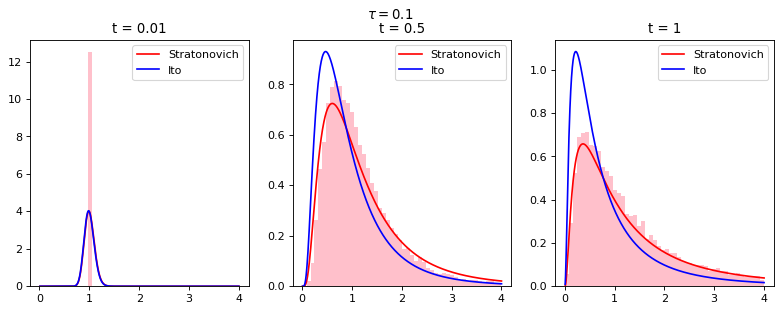

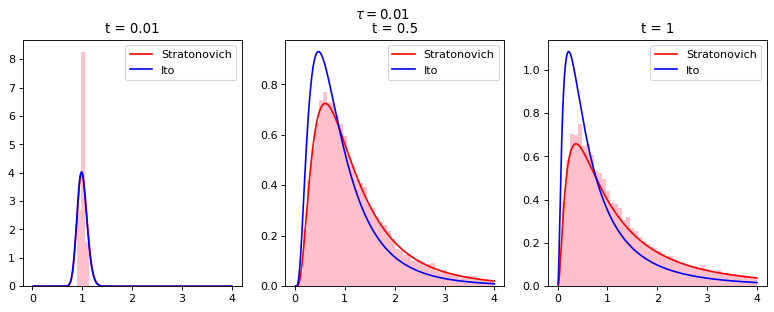

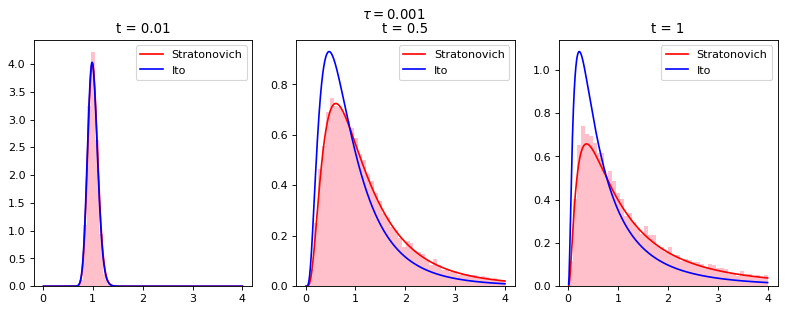

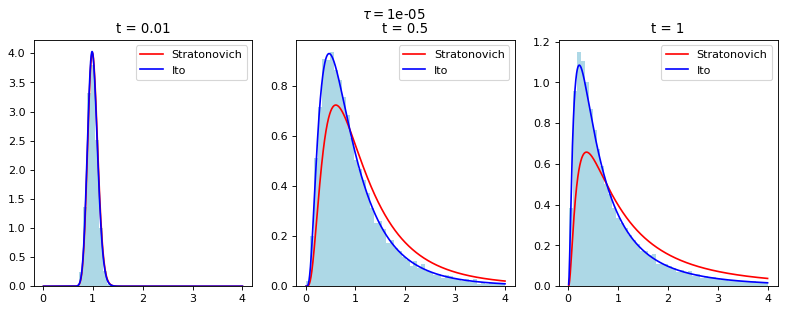

In [7]:
t_list = [0.01, 1/2, 1]
for j,𝜏 in enumerate(𝜏_list):
    fig = plt.figure(figsize=(len(t_list)*4,4), dpi=80)
    ax = fig.subplots(1,len(t_list))
    for i,t in enumerate(t_list):
        bin_val, bin_edge, patches = ax[i].hist(X_array_colored_list[j][int(t/dt)-1,:], bins = 50, 
                                              density = True, 
                                              range = (0.01,4),
                                              color = "pink" if 𝜏>dt else "lightblue")
        x = np.linspace(min(bin_edge),max(bin_edge),1000)
        ax[i].plot(x, P_strato(x,t), color = "red", label = "Stratonovich")
        ax[i].plot(x, P_ito(x,t), color = "blue", label = "Ito")
        ax[i].set_title(f"t = {t}")
        ax[i].legend()
    plt.suptitle(fr"$\tau=${𝜏}")
    plt.show()